In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
video = "/content/drive/MyDrive/Abuse001_x264.mp4"

In [ ]:
import cv2
import os


cap = cv2.VideoCapture(video)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Create a directory to save extracted frames
frame_output_dir = 'frames'
os.makedirs(frame_output_dir, exist_ok=True)

orginal_frame_count = 0
frame_count = 1
previous_frame = None
threshold = 500000

# Loop through the video and extract frames
while True:
    ret, frame = cap.read()
    orginal_frame_count += 1
    if not ret:
        break  # End of video

    if previous_frame is not None:
      frame_diff = cv2.absdiff(frame, previous_frame)
      change_score = frame_diff.sum()
    else:
        change_score = threshold + 1

    # Define the output filename for the frame
    if change_score > threshold:
      # Define the output filename for the frame
      frame_filename = os.path.join(frame_output_dir, f'frame_{frame_count:04d}.jpg')

      # Save the frame as an image
      cv2.imwrite(frame_filename, frame)
      previous_frame = frame
      frame_count += 1

# Release the video capture object
cap.release()
print(f"Orginal Frames Count: {orginal_frame_count}")
print(f"Frames extracted: {frame_count}")


Orginal Frames Count: 2730
Frames extracted: 159


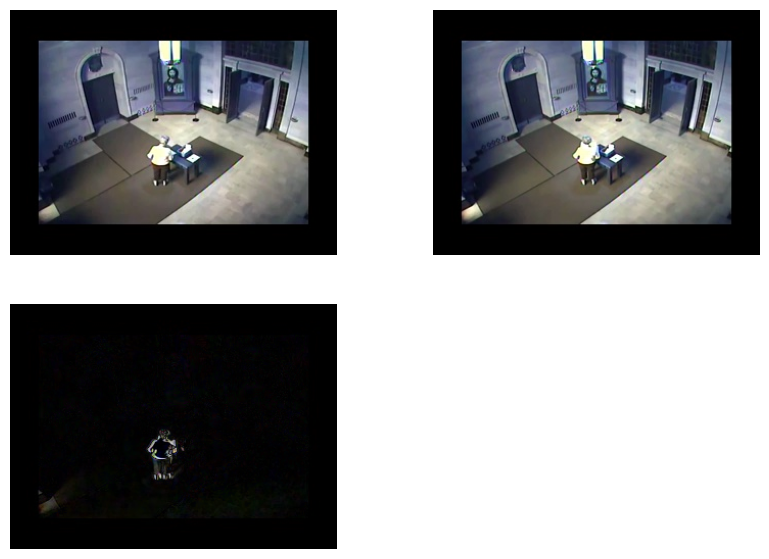

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img1 = cv2.imread("/content/frames/frame_0001.jpg")
img2 = cv2.imread("/content/frames/frame_0004.jpg")
img = cv2.absdiff(img1, img2)

fig = plt.figure(figsize=(10, 7))
rows, cols = 2, 2
plt.subplot(rows, cols, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(rows, cols, 2)
plt.axis('off')
plt.imshow(img2)
plt.subplot(rows, cols, 3)
plt.axis('off')
plt.imshow(img)

In [ ]:
import cv2
import os

# Set the path to the folder containing image frames
frames_folder = 'frames'

# Define the output video file path and parameters
output_video_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You may need to adjust the codec based on your system
fps = 15.0  # Frames per second
frame_size = (img1.shape[1], img1.shape[0])  # Set the width and height of frames (adjust as needed)

# Get the list of image files in the frames folder
frame_files = [f for f in os.listdir(frames_folder) if f.endswith('.jpg')]

# Sort the frame files by their numeric order in the filenames
frame_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# Create a VideoWriter object
out = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

# Loop through the image frames and write them to the video
for frame_file in frame_files:
    frame_path = os.path.join(frames_folder, frame_file)
    frame = cv2.imread(frame_path)
    out.write(frame)

# Release the VideoWriter object
out.release()

print(f"Video saved to {output_video_path}")


Video saved to output_video.mp4
